In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [2]:
#Loading dataset
data=pd.read_csv(r"C:\Users\anshu\Downloads\StudentPerformanceFactors.csv")

In [3]:
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


#### Because it's my first model i am applying linear regression on Hours_studied(independent) and Exam_score(dependent) with only 101 rows so i will be dropping other columns

In [8]:
df=data.copy()

In [9]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [11]:
df.drop(columns=['Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender'],inplace=True)

In [19]:
df.drop(range(101,6607),inplace=True)

In [22]:
df

,Hours_Studied,Exam_Score
0,23,67
1,19,61
2,24,74
3,29,71
4,19,70
...,...,...
96,22,62
97,22,68
98,20,66
99,19,64


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Hours_Studied  101 non-null    int64
 1   Exam_Score     101 non-null    int64
dtypes: int64(2)
memory usage: 1.7 KB


In [105]:
df.describe()

,Hours_Studied,Exam_Score
count,101.000000,101.000000
mean,19.316832,67.148515
std,5.456978,4.543977
min,4.000000,60.000000
25%,16.000000,64.000000
50%,19.000000,67.000000
75%,22.000000,69.000000
max,31.000000,100.000000


In [24]:
df[df.duplicated()]

,Hours_Studied,Exam_Score
36,21,64
39,21,64
46,17,68
51,18,64
53,24,67
69,16,65
71,29,71
75,25,66
78,21,64
81,22,66


In [25]:
df.isnull().sum()

Hours_Studied    0
Exam_Score       0
dtype: int64

In [26]:
df.columns

Index(['Hours_Studied', 'Exam_Score'], dtype='object')

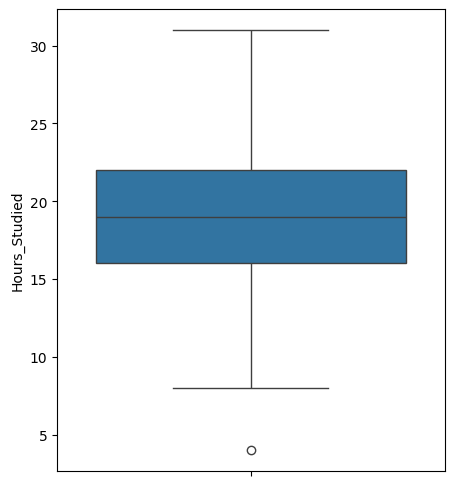

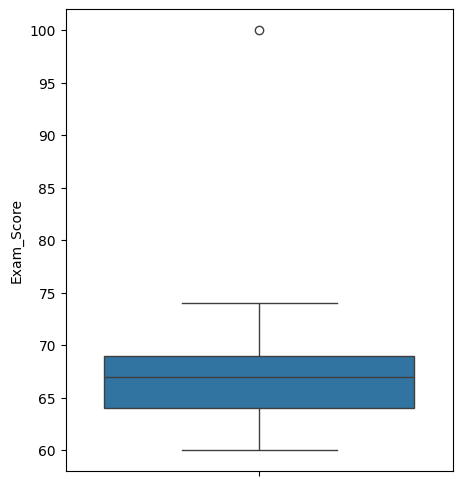

In [27]:
for col in df.columns:
    plt.figure(figsize=(5,6))
    sns.boxplot(df[col])

In [29]:
df[(df["Hours_Studied"]<6) | (df["Exam_Score"]>95)]

,Hours_Studied,Exam_Score
74,4,69
94,18,100


In [31]:
df.to_csv("student.csv", index=False)


In [33]:
df.shape

(101, 2)

In [32]:
df.describe()

,Hours_Studied,Exam_Score
count,101.000000,101.000000
mean,19.316832,67.148515
std,5.456978,4.543977
min,4.000000,60.000000
25%,16.000000,64.000000
50%,19.000000,67.000000
75%,22.000000,69.000000
max,31.000000,100.000000


In [34]:
df["Hours_Studied"].max()

np.int64(31)

-0.20037584496779817
3.7593390956878365


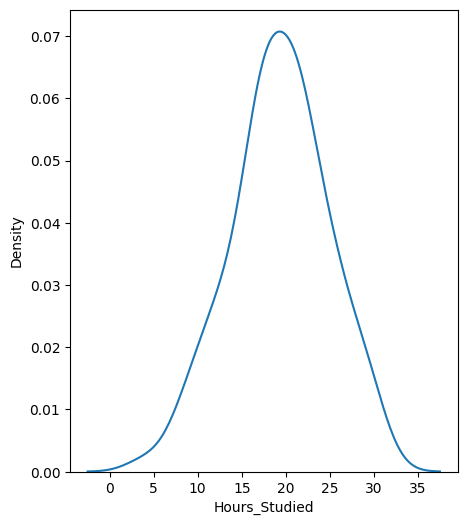

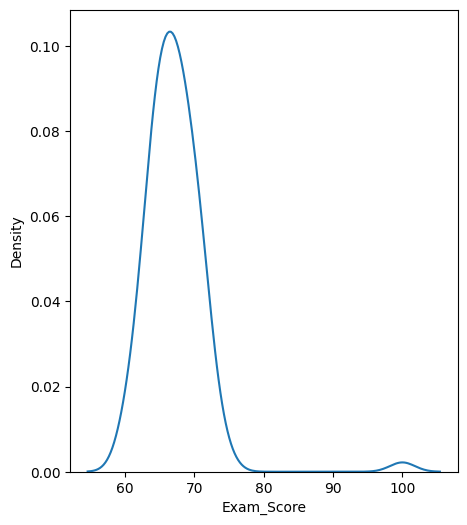

In [35]:
for col in df.columns:
    plt.figure(figsize=(5,6))
    print(df[col].skew())
    sns.kdeplot(df[col])
plt.show()

In [36]:
df["Exam_Score"].skew()

np.float64(3.7593390956878365)

In [37]:
df.columns

Index(['Hours_Studied', 'Exam_Score'], dtype='object')

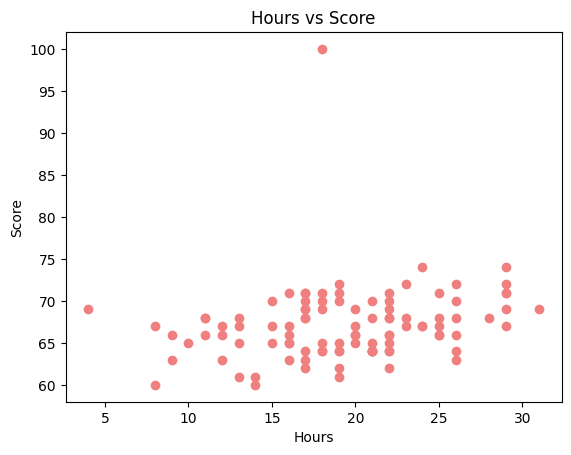

In [41]:
# Relationship between Studied Hours and Exam Score
plt.scatter(df['Hours_Studied'], df['Exam_Score'], color = 'lightcoral')
plt.title('Hours vs Score')
plt.xlabel('Hours')
plt.ylabel('Score')
#plt.box(False)
plt.show()

In [42]:
df.corr()

,Hours_Studied,Exam_Score
Hours_Studied,1.000000,0.204968
Exam_Score,0.204968,1.000000


In [43]:
#Splitting dataset

In [45]:
X=df.drop("Exam_Score",axis=1)
y=df["Exam_Score"]

In [47]:
X

,Hours_Studied
0,23
1,19
2,24
3,29
4,19
...,...
96,22
97,22
98,20
99,19


In [48]:
y

0      67
1      61
2      74
3      71
4      70
       ..
96     62
97     68
98     66
99     64
100    67
Name: Exam_Score, Length: 101, dtype: int64

In [50]:
#Splitting data in train,test sets-(train-80%/test-20%)

In [51]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [52]:
X_train.shape

(80, 1)

In [53]:
X_test.shape

(21, 1)

In [54]:
#Applying Model

In [55]:
lreg=LinearRegression()

In [56]:
lreg.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [57]:
#Predicting result

In [58]:
y_pred=lreg.predict(X_test)

In [59]:
y_pred

array([65.98557503, 67.8260811 , 67.67270559, 67.9794566 , 67.8260811 ,
       66.75245256, 66.13895053, 68.43958312, 67.9794566 , 67.36595458,
       67.67270559, 66.75245256, 67.21257907, 65.37207301, 67.8260811 ,
       66.44570155, 67.05920357, 66.59907705, 66.13895053, 66.59907705,
       66.75245256])

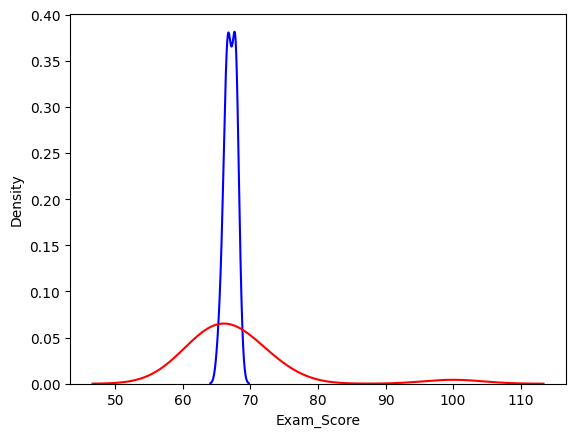

In [60]:
sns.kdeplot(y_pred,color='blue')
sns.kdeplot(y_test,color='red')
plt.show()

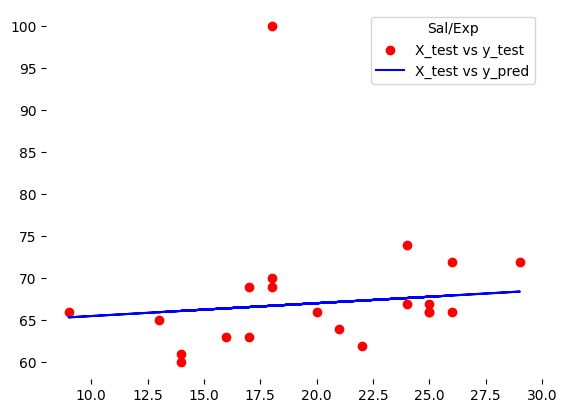

In [62]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.legend(['X_test vs y_test', 'X_test vs y_pred'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [63]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE of linear regression model is:", mae)
print("MSE of linear regression model is:", mse)
print("R2 score of linear regression model is:", round(r2*100,2),"%")

MAE of linear regression model is: 4.369340207305569
MSE of linear regression model is: 63.70874476875446
R2 score of linear regression model is: 0.46 %


### Improving model

In [69]:
df1=data.copy()

In [71]:
df1.drop(columns=['Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender'],inplace=True)

In [72]:
df1

,Hours_Studied,Exam_Score
0,23,67
1,19,61
2,24,74
3,29,71
4,19,70
...,...,...
6602,25,68
6603,23,69
6604,20,68
6605,10,68


In [74]:
df1.isna().sum()

Hours_Studied    0
Exam_Score       0
dtype: int64

In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Hours_Studied  6607 non-null   int64
 1   Exam_Score     6607 non-null   int64
dtypes: int64(2)
memory usage: 103.4 KB


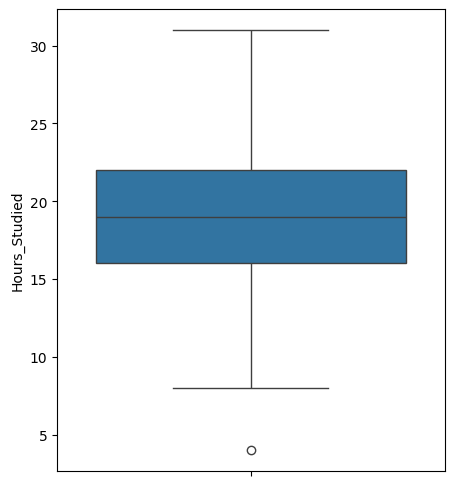

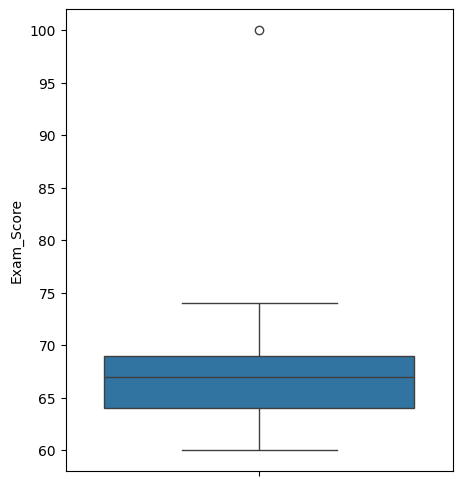

In [76]:
for col in df1.columns:
    plt.figure(figsize=(5,6))
    sns.boxplot(df[col])

In [77]:
df1.describe()

,Hours_Studied,Exam_Score
count,6607.000000,6607.000000
mean,19.975329,67.235659
std,5.990594,3.890456
min,1.000000,55.000000
25%,16.000000,65.000000
50%,20.000000,67.000000
75%,24.000000,69.000000
max,44.000000,101.000000


In [80]:
df1[df1["Exam_Score"]>100]

,Hours_Studied,Exam_Score
1525,27,101


In [81]:
df1.drop([1525],inplace=True)

In [82]:
df1

,Hours_Studied,Exam_Score
0,23,67
1,19,61
2,24,74
3,29,71
4,19,70
...,...,...
6602,25,68
6603,23,69
6604,20,68
6605,10,68


In [83]:
df1[df1["Exam_Score"]>100]

,Hours_Studied,Exam_Score


-0.20037584496779817
3.7593390956878365


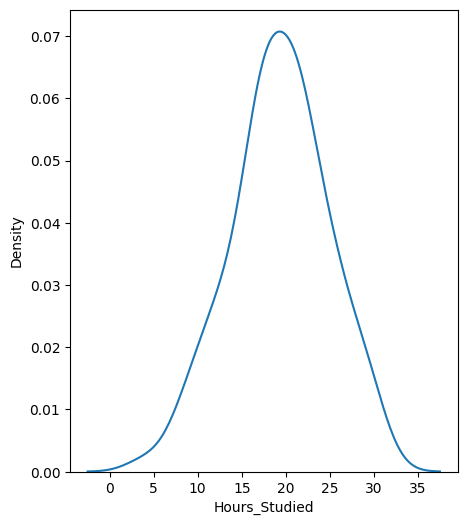

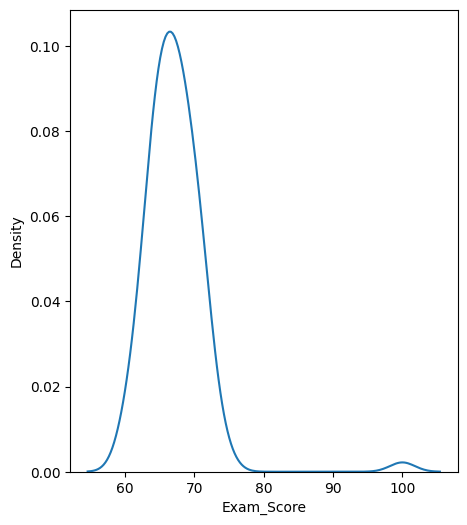

In [84]:
for col in df1.columns:
    plt.figure(figsize=(5,6))
    print(df[col].skew())
    sns.kdeplot(df[col])
plt.show()

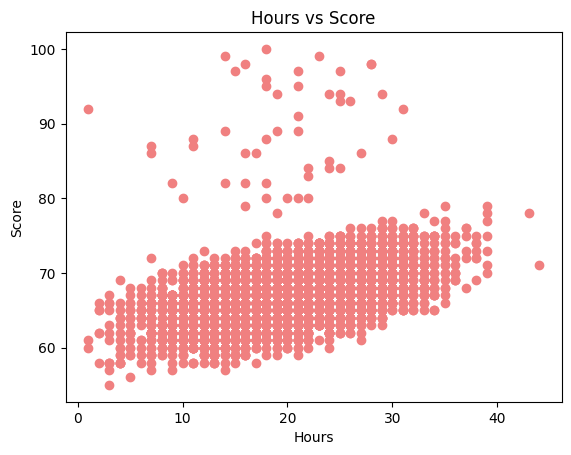

In [86]:
# Relationship between Studied Hours and Exam Score
plt.scatter(df1['Hours_Studied'], df1['Exam_Score'], color = 'lightcoral')
plt.title('Hours vs Score')
plt.xlabel('Hours')
plt.ylabel('Score')
#plt.box(False)
plt.show()

In [87]:
df1.corr()

,Hours_Studied,Exam_Score
Hours_Studied,1.000000,0.446514
Exam_Score,0.446514,1.000000


In [88]:
X=df1.drop("Exam_Score",axis=1)
y=df1["Exam_Score"]

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [90]:
X_train.shape

(5284, 1)

In [91]:
X_test.shape

(1322, 1)

In [92]:
lreg=LinearRegression()

In [93]:
lreg.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [94]:
y_pred =lreg.predict(X_test)

In [95]:
y_pred

array([67.52173669, 65.49263916, 66.94199454, ..., 67.81160776,
       65.78251024, 64.33315486], shape=(1322,))

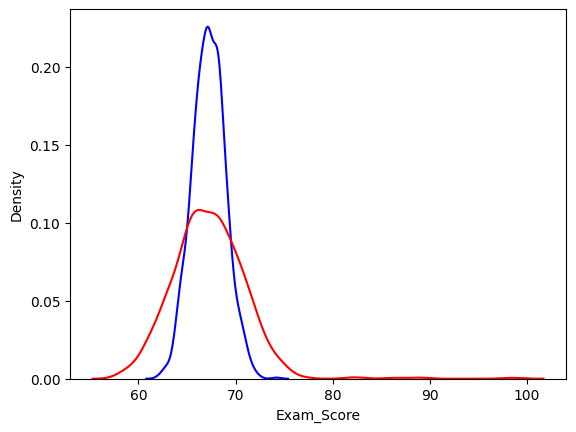

In [96]:
sns.kdeplot(y_pred,color='blue')
sns.kdeplot(y_test,color='red')
plt.show()

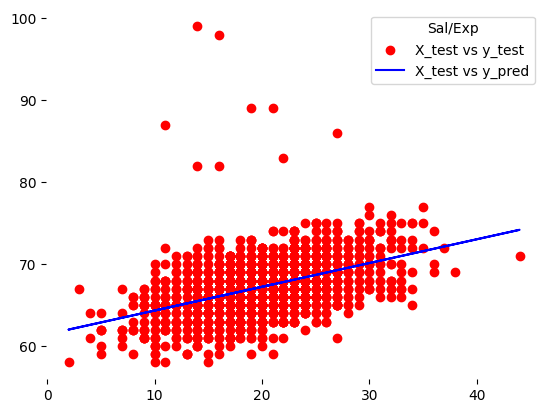

In [99]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.legend(['X_test vs y_test', 'X_test vs y_pred'], title = 'Sal/Exp', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [97]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE of linear regression model is:", mae)
print("MSE of linear regression model is:", mse)
print("R2 score of linear regression model is:", round(r2*100,2),"%")

MAE of linear regression model is: 2.5377231064986745
MSE of linear regression model is: 11.906958066802392
R2 score of linear regression model is: 18.59 %


In [98]:
print(r2)

0.18594143117370365


### Decision Tree

In [100]:
dt=DecisionTreeRegressor()

In [101]:
dt.fit(X_train,y_train)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max

In [102]:
dt_pred=dt.predict(X_test)

<Axes: xlabel='Exam_Score', ylabel='Density'>

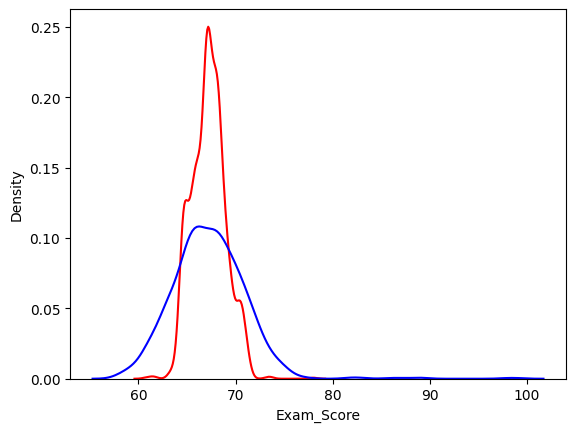

In [103]:
sns.kdeplot(dt_pred,color='red')
sns.kdeplot(y_test,color='blue')

In [104]:
mae = mean_absolute_error(y_test, dt_pred)
r2 = r2_score(y_test, dt_pred)
print("MAE of decision tree regression model is:", mae)
print("R2 score of decision tree regression model is:", r2)

MAE of decision tree regression model is: 2.558828358518073
R2 score of decision tree regression model is: 0.1752139907804683


In [109]:
df.columns

Index(['Hours_Studied', 'Exam_Score'], dtype='object')

In [110]:
df_pre = pd.DataFrame({'Hours_Studied':2.0},index=[0])

In [111]:
df_pre

,Hours_Studied
0,2.0


In [112]:
lreg.predict(df_pre)

array([62.01418625])

In [113]:
import joblib

In [114]:
joblib.dump(lreg,'model_score')

['model_score']